In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [79]:
empl=pd.read_csv('empl.csv')
empl

,No,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [80]:
empl.drop(['No'],axis=1,inplace=True)

In [81]:
empl.drop(['Name'],axis=1,inplace=True)

In [82]:
empl

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.0
1,31.0,Edmonto,Canada,3900.0
2,34.0,Toronto,Canada,8000.0
3,26.0,HongKong,Asia,66672.0
4,30.0,NaN,America,NaN
5,NaN,HongKong,Asia,30007.0
6,43.0,BayArea,America,8300.0
7,38.0,Hyderabad,Asia,54666.0
8,50.0,newyork,America,67666.0
9,NaN,newyork,America,8888.0


In [83]:
empl.dropna(axis=0,inplace=True)

In [84]:
empl.isnull().sum()

Age        0
City       0
Country    0
Salary     0
dtype: int64

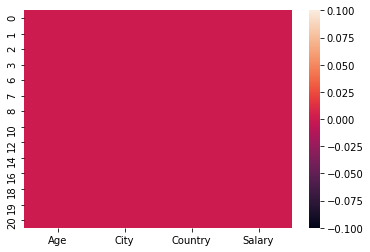

In [85]:
sns.heatmap(empl.isnull())

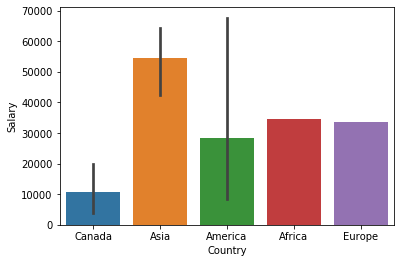

In [86]:
sns.barplot(x=empl['Country'],y=empl['Salary'])

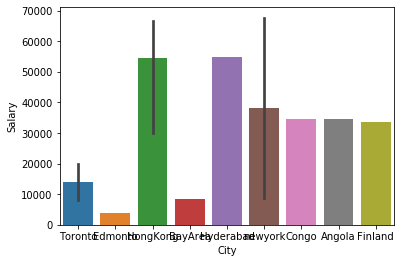

In [87]:
sns.barplot(x=empl['City'],y=empl['Salary'])

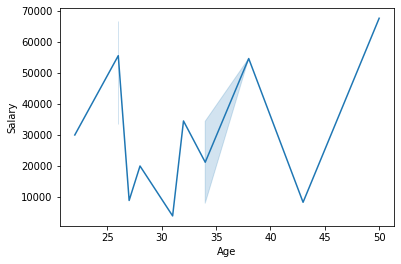

In [88]:
sns.lineplot(x=empl['Age'],y=empl['Salary'])

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
empl['Country']=le.fit_transform(empl['Country'])
empl['City']=le.fit_transform(empl['City'])

In [90]:
empl.corr()

,Age,City,Country,Salary
Age,1.000000,0.025787,-0.359269,0.159232
City,0.025787,1.000000,0.355315,0.194891
Country,-0.359269,0.355315,1.000000,-0.150519
Salary,0.159232,0.194891,-0.150519,1.000000


In [91]:
empl.drop(['Country'],axis=1,inplace=True)

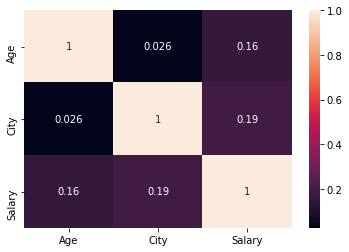

In [92]:
sns.heatmap(empl.corr(),annot=True)

In [93]:
empl.describe()

,Age,City,Salary
count,14.000000,14.000000,14.000000
mean,32.500000,4.785714,35132.428571
std,7.703645,2.516975,23518.179691
min,22.000000,0.000000,3900.000000
25%,26.250000,3.250000,11666.000000
50%,31.500000,5.000000,33941.500000
75%,37.000000,6.750000,54666.000000
max,50.000000,8.000000,67666.000000


In [94]:
from scipy.stats import zscore
z_sc=abs(zscore(empl))
empl=empl[(z_sc<3).all(axis=1)]

In [95]:
empl.shape

(14, 3)

In [96]:
empl.skew()

Age       0.905716
City     -0.562357
Salary    0.142454
dtype: float64

In [102]:
from scipy.stats import boxcox
empl['Age']=boxcox(empl['Age'],0)

In [103]:
x=empl.iloc[:,:-1]
x.head()

,Age,City
0,3.332205,7
1,3.433987,3
2,3.526361,7
3,3.258097,5
6,3.761200,1


In [104]:
y=empl.iloc[:,-1]
y.head()

0    20000.0
1     3900.0
2     8000.0
3    66672.0
6     8300.0
Name: Salary, dtype: float64

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
max_r=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    print("r2 Score Corresponding to",r_state,"is",r2scr)
    if r2scr>max_r:
        max_r=r2scr
        max_r_state=r_state

print()
print('The maximum r2 Score is',max_r,'corresponding to r value',max_r_state)

r2 Score Corresponding to 42 is -0.11319589236648864
r2 Score Corresponding to 43 is -0.3189738926561201
r2 Score Corresponding to 44 is -7.6358976432103915
r2 Score Corresponding to 45 is -7.635897643210395
r2 Score Corresponding to 46 is -0.4431826508633172
r2 Score Corresponding to 47 is -0.9070378461848081
r2 Score Corresponding to 48 is -1.4970832421348503
r2 Score Corresponding to 49 is -0.7561243421496888
r2 Score Corresponding to 50 is -1.1448854154252874
r2 Score Corresponding to 51 is -0.5142063817590019
r2 Score Corresponding to 52 is 0.03404423588752847
r2 Score Corresponding to 53 is -5.263789045007108
r2 Score Corresponding to 54 is -0.5544195569275403
r2 Score Corresponding to 55 is -5.329907562086879
r2 Score Corresponding to 56 is -1.7325318696521181
r2 Score Corresponding to 57 is -0.5544195569275407
r2 Score Corresponding to 58 is -22.724028042244367
r2 Score Corresponding to 59 is -9.470747762041068
r2 Score Corresponding to 60 is -0.35918537524420935
r2 Score Corre

In [108]:
#More Data is required,hence trying with city omitted

In [118]:
empl2=pd.read_csv('empl.csv')
x=empl2.iloc[:,2:3]
x.shape
y=empl2.iloc[:,-1]
y.shape

(22,)

0     20000.0
1      3900.0
2      8000.0
3     66672.0
4         NaN
5     30007.0
6      8300.0
7     54666.0
8     67666.0
9      8888.0
10    66672.0
11    34344.0
12    30007.0
13     8300.0
14    54666.0
15    67666.0
16     8888.0
17        NaN
18    34432.0
19    34534.0
20    33451.0
21        NaN
Name: Salary, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
max_r=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    print("r2 Score Corresponding to",r_state,"is",r2scr)
    if r2scr>max_r:
        max_r=r2scr
        max_r_state=r_state

print()
print('The maximum r2 Score is',max_r,'corresponding to r value',max_r_state)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').